# Lab 4: Signal Filtering

#### Author: Yuriy Pasichnyk

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from scipy.io import wavfile
%matplotlib inline

**Для всіх завдань програмно будувати:** 
- графік початкового сигналу та його амплітудного спектру
- графік шуму та його амплітудного спектру
- графік зашумленого сигналу та його амплітудного спектру
- графік АЧХ фільтра
- графік відфільтрованого сигналу та його амплітудного спектру.

**Для всіх фільтрів:**
- максимальний припустимий коефіцієнт передачі на частоті зрізу = 3 дБ
- мінімальний  припустимий коефіцієнт передачі на частоті затримки обрати так, щоб порядок фільтра був  5 < n < 10

In [2]:
def get_sq_pulse(start, duty, freq, val, duration):
    res = np.zeros(duration * freq)
    start_i = int(start * freq) 
    duty_count = int(duty * freq)
    res[start_i:start_i + duty_count] = val
    return res

def plot_signal_segment(signal, start_t, end_t, freq, p_title='Signal plot', 
                        p_signal_axes='signal', p_size=(15, 7), get_segment=False, extert_plt=False,
                        create_plt=True):
    # Validate
    tatal_t = len(signal) / freq # time in sec
    if start_t > end_t or end_t > tatal_t:
        raise RuntimeError("Invalid time range boundaries!")
    
    # Data construct
    start_i = int(start_t * freq)
    end_i = int(end_t * freq)
    signal_s = signal[start_i:end_i]
    t = np.arange(start_t, end_t - 1 / freq / 2, 1 / freq)
    
    # Plot
    if create_plt:
        plt.figure(figsize=p_size)
    
    plt.plot(t, signal_s)
    
    if create_plt:
        plt.title(p_title)
        plt.xlabel('Time, s')
        plt.ylabel(p_signal_axes)
    
    if not extert_plt:
        plt.show()
    
    if get_segment:
        return t, signal_s
    
def print_signal(signal, tt, s_name, sample_rate):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,5))

    ax1.plot(tt, signal)
    ax1.set(xlabel='Time, s', ylabel='Voltage, V')
    ax1.set_title(s_name)
    ax1.grid(True)

    ax2.magnitude_spectrum(signal, Fs=sample_rate, scale='linear')
    ax2.set_title(f'{s_name} Amplitude Spectrogam')
    ax2.set(xlabel='Frequency, Hz', ylabel='Amplitude, V')
    ax2.grid(True)
    
    plt.show()

def print_f_resp(N, b, a, sample_rate):
    print("Fileter rank:", N)
    
    w, h = signal.freqz(b, a, fs=sample_rate)
    plt.figure(figsize=(15,5))
    plt.plot(w, np.absolute(h))
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Gain')
    plt.title('Frequency Response')
    plt.grid(True)

    
def freq2wx(fr, fr_sign):
    return fr / fr_sign * 2

## Task 1.  
- Сформувати вектор відліків часу тривалістю 5 с для частоти дискретизації 128Гц.
- Сформувати прямокутний імпульс в момент часу 3 с тривалості 0.1 с амплітуди 1 В.
- Додати до сигналу випадковий шумовий сигнал із нульовим середнім значенням амплітуди 0.5 В.
- Спроектувати ФНЧ Батерворта для позбавлення сигналу від шуму (функції buttord, butter, lfilter).

### Process data

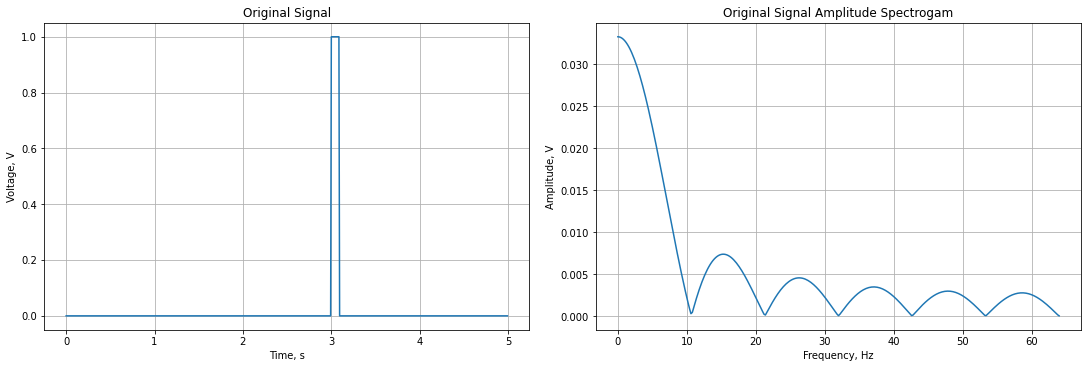

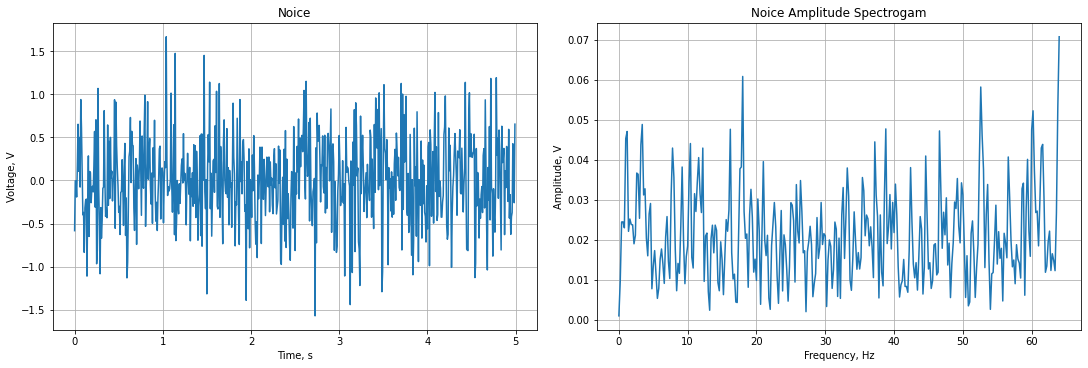

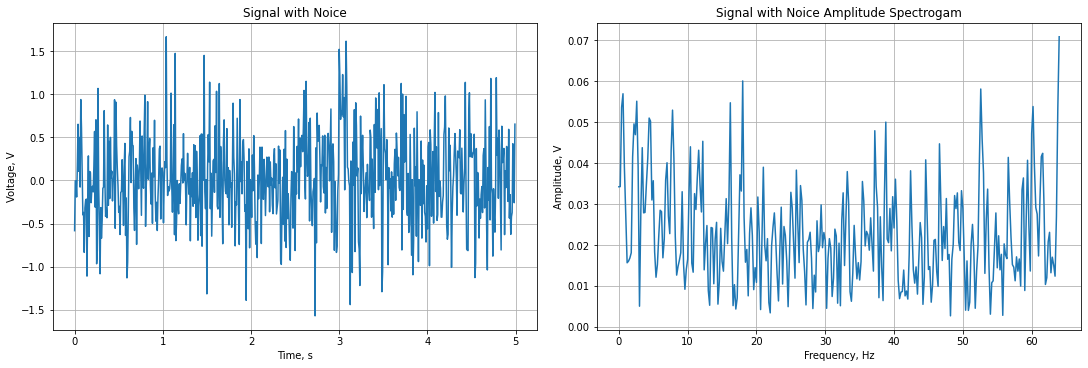

In [3]:
freq = 128
t = np.arange(0, 5, 1 / freq)
sq_pulce = get_sq_pulse(3, 0.1, freq, 1, 5)
noice = np.random.normal(0, .5, len(t))
sq_pulce_n = sq_pulce + noice

print_signal(sq_pulce, t, 'Original Signal', freq)
print_signal(noice, t, 'Noice', freq)
print_signal(sq_pulce_n, t, 'Signal with Noice', freq)

### Use Butterworth Filters

Fileter rank: 7


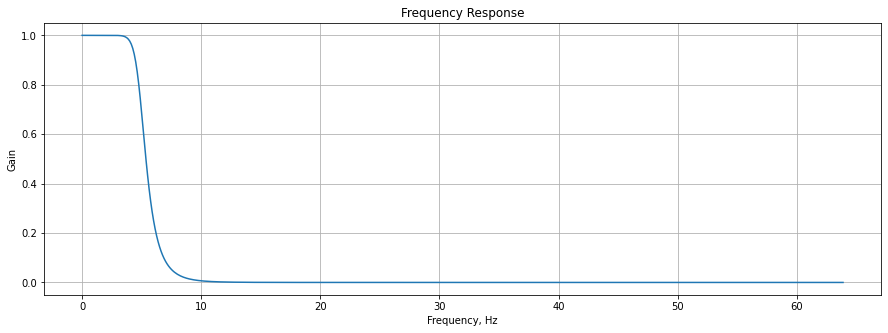

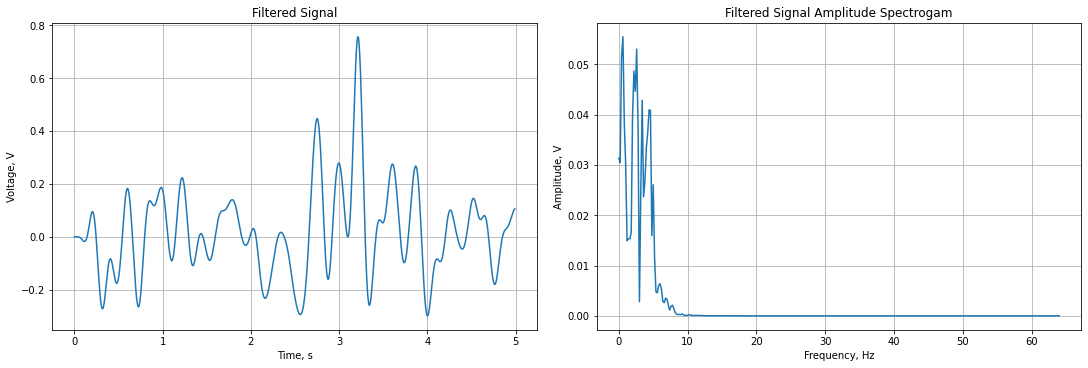

In [4]:
N, Wn = signal.buttord(wp = freq2wx(4.5, freq), ws = freq2wx(7.5, freq), gpass=1, gstop=25, analog=False, fs=freq)
b, a = signal.butter(N, Wn)

print_f_resp(N, b, a, freq)
print_signal(signal.lfilter(b, a, sq_pulce_n), t, 'Filtered Signal', freq)

## Task 2.
- Сформувати вектор відліків часу тривалістю 1 с для частоти дискретизації 128Гц.
- Сформувати сигнали ділянки синусоїди частотою 10 Гц амплітуди 1 В.
- Додати випадковий сигнал з нульовим середнім значенням амплітуди 2 В.
- Спроектувати ФНЧ, ФВЧ та СФ Чебишова І роду для позбавлення сигналу від шуму (cheb1ord, cheby1).

In [11]:
dt = 0.000000001
duration = 1. + dt  # sec 
freq = 128.  # Hz
t = np.arange(0., duration, 1. / freq)
sin_s = np.sin(t * 10. * 2. * np.pi)
noice = np.random.normal(0, 2, len(t))
signal_w_noice = sin_s + noice

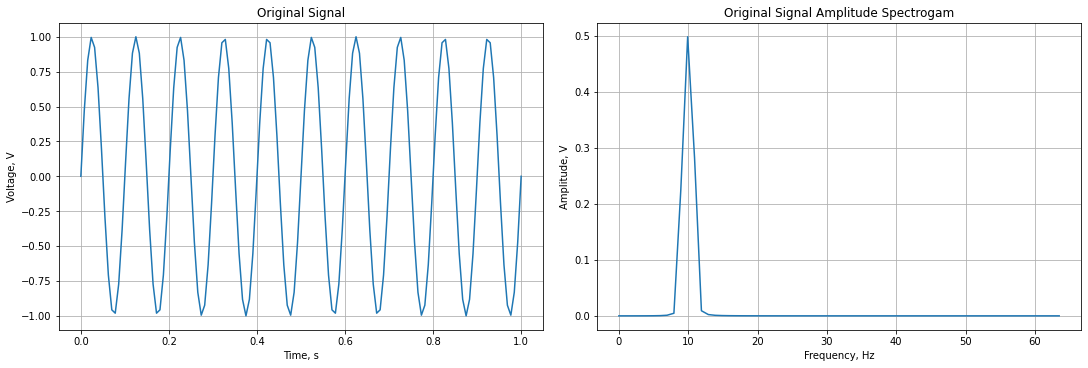

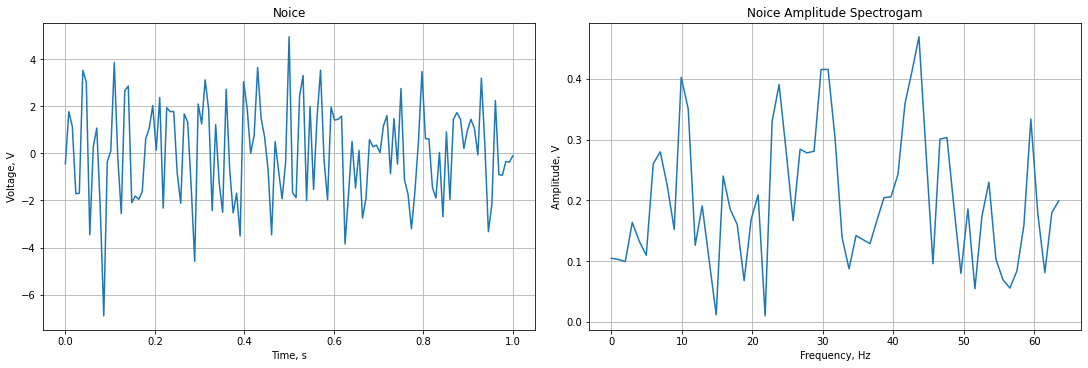

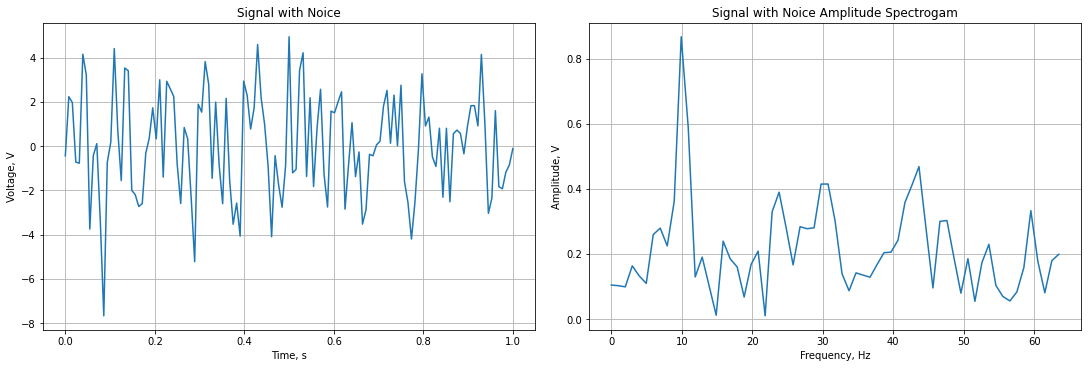

In [6]:
print_signal(sin_s, t, 'Original Signal', freq)
print_signal(noice, t, 'Noice', freq)
print_signal(signal_w_noice, t, 'Signal with Noice', freq)

Fileter rank: 20


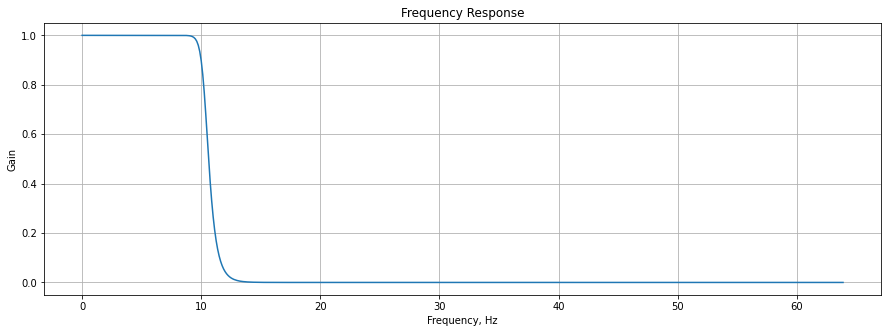

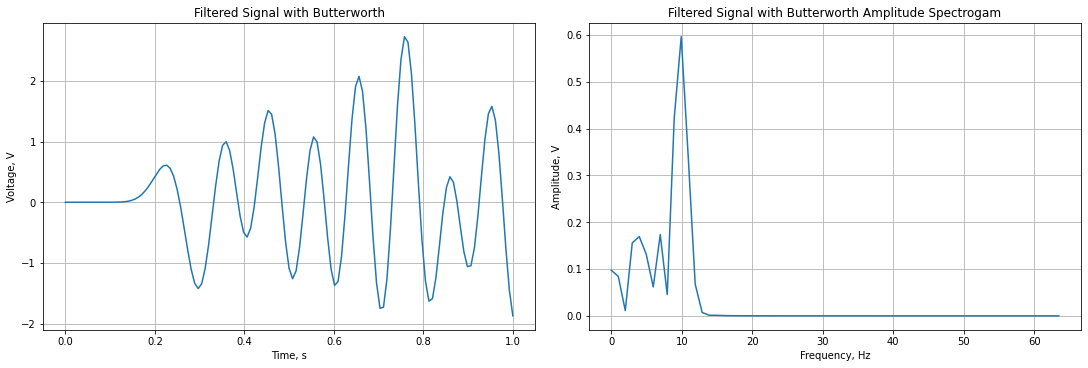

In [7]:
N, Wn = signal.buttord(wp = freq2wx(10, freq), ws = freq2wx(14, freq), gpass=1, gstop=50, analog=False, fs=freq)
# wp = 0.15, ws = 0.27, gpass=3, gstop=50)
but_low_filter = signal.butter(N, Wn, 'lowpass')
# print(freq2wx(10 * 2, freq), freq2wx(15, freq), freq)
signal_filtered_but = signal.lfilter(*but_low_filter, signal_w_noice)
print_f_resp(N, *but_low_filter, freq)
print_signal(signal_filtered_but, t, 'Filtered Signal with Butterworth', freq)

Fileter rank: 3


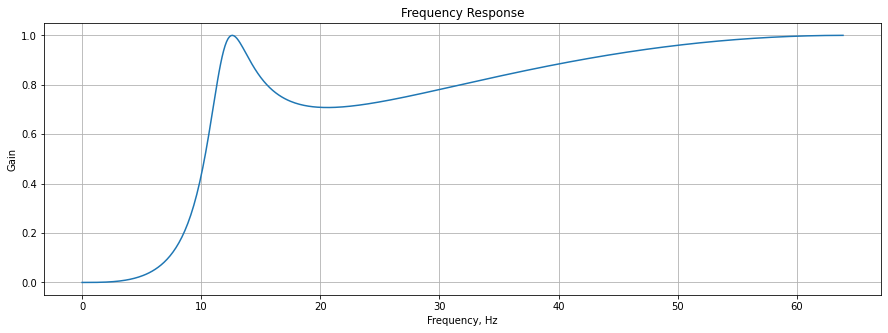

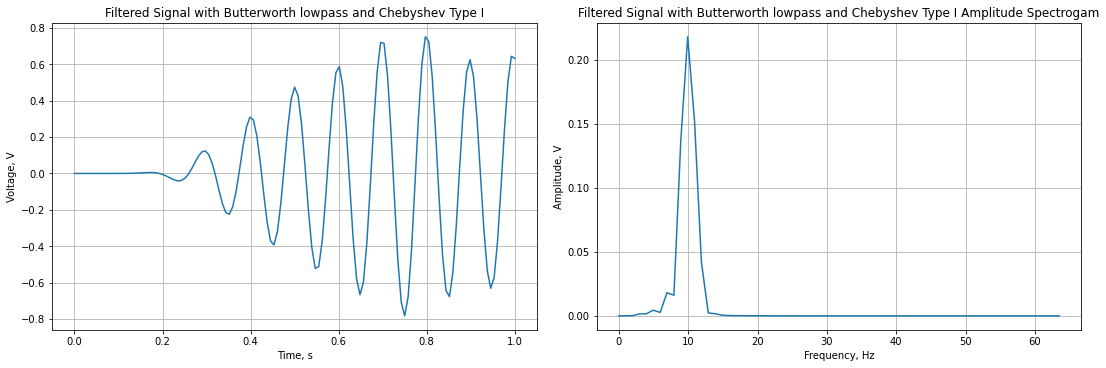

In [8]:
N, Wn = signal.cheb1ord(wp = freq2wx(11, freq), ws = freq2wx(1, freq), gpass=3, gstop=50, analog=False, fs=freq)
#     0.125, 0.121, 1, 8)
cheb_filter = signal.cheby1(N, 3, Wn, 'highpass')
signal_filtered_but_cheb = signal.lfilter(*cheb_filter, signal_filtered_but)

print_f_resp(N, *cheb_filter, freq)
print_signal(signal_filtered_but_cheb, t, 'Filtered Signal with Butterworth lowpass and Chebyshev Type I', freq)

## Task 3. 
- Сформувати вектор відліків часу тривалістю 10 с для частоти дискретизації 128Гц.
- Сформувати випадковий сигнал амплітуди 10 мВ з нульовим середнім значенням, який зашумлений мережевою перешкодою частоти 50 Гц амплітуди 1 В.
- Спроектувати ЗФ Батерворта для позбавлення сигналу від перешкоди.

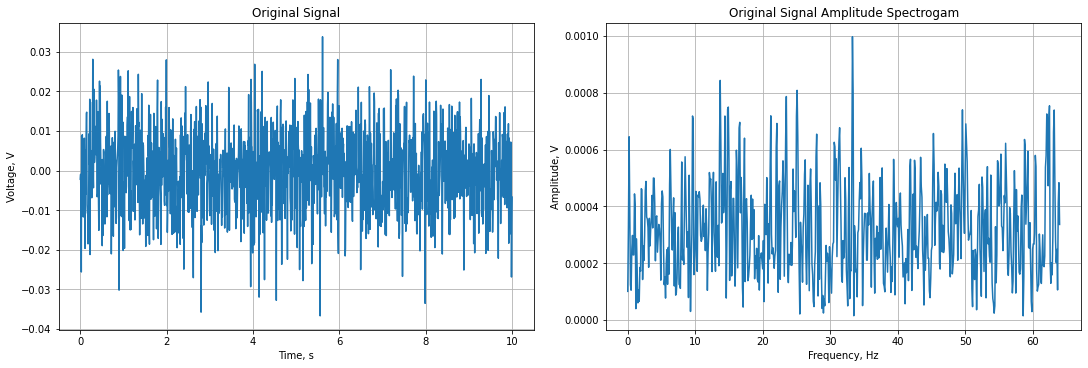

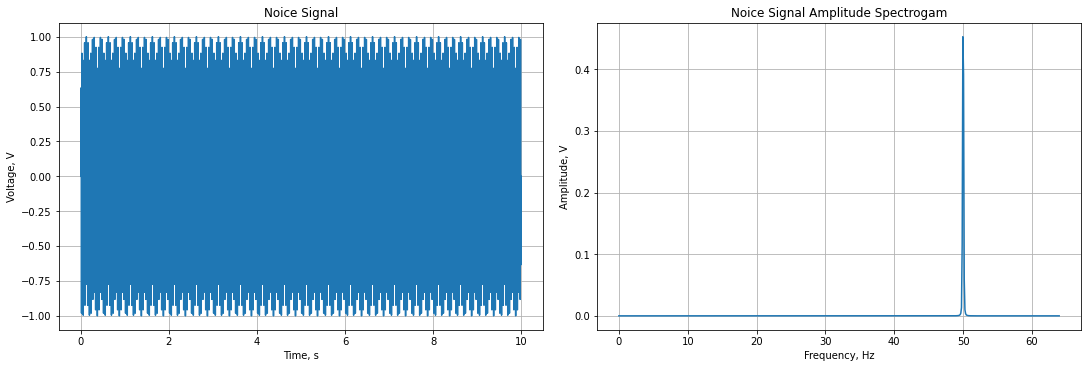

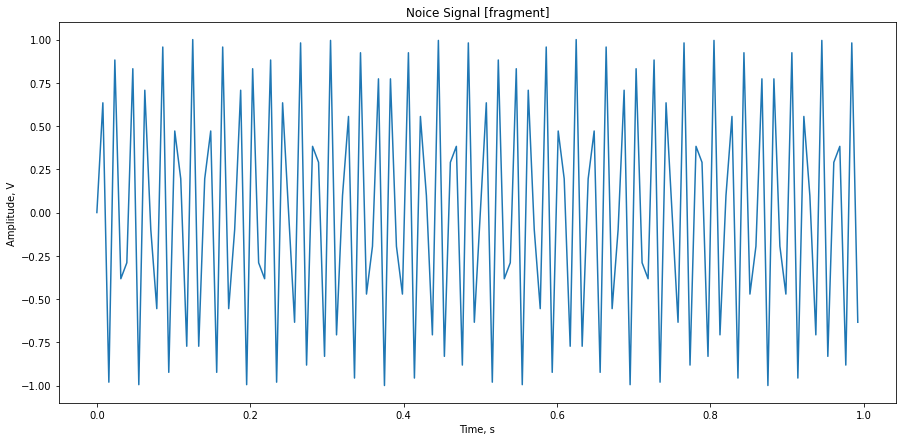

In [12]:
dt = 0.000000001
duration = 10. + dt  # sec 
freq = 128.  # Hz
t = np.arange(0., duration, 1. / freq)
sign_s = np.random.normal(0, 0.01, len(t))
noice = np.sin(t * 2 * np.pi * 50)
sign_w_noice = sign_s + noice

print_signal(sign_s, t, 'Original Signal', freq)
print_signal(noice, t, 'Noice Signal', freq)
plot_signal_segment(noice, 0, 1, freq, p_title='Noice Signal [fragment]', p_signal_axes='Amplitude, V')

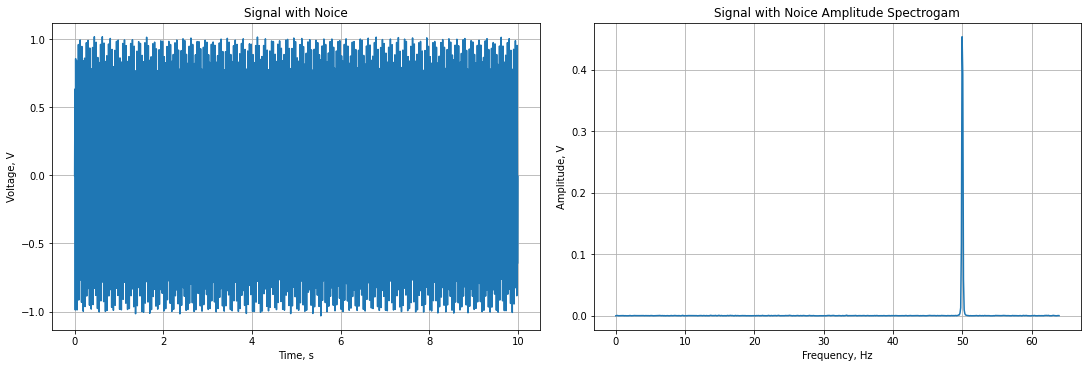

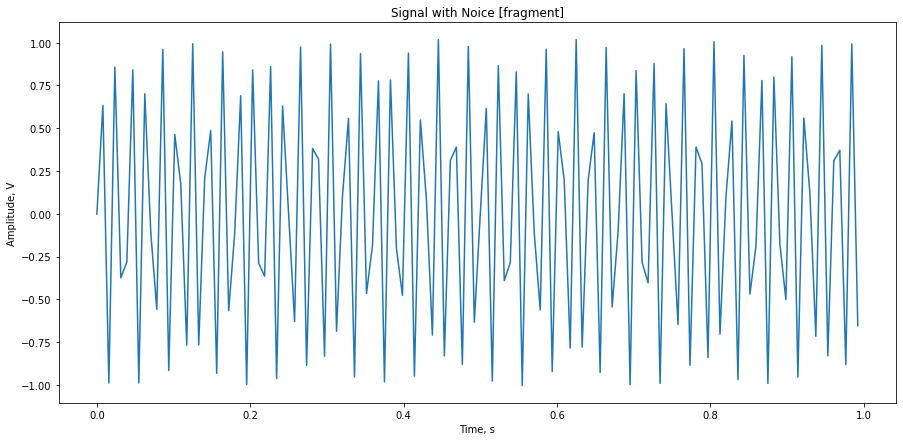

In [13]:
print_signal(sign_w_noice, t, 'Signal with Noice', freq)
plot_signal_segment(sign_w_noice, 0, 1, freq, p_title='Signal with Noice [fragment]', p_signal_axes='Amplitude, V')

Fileter rank: 10


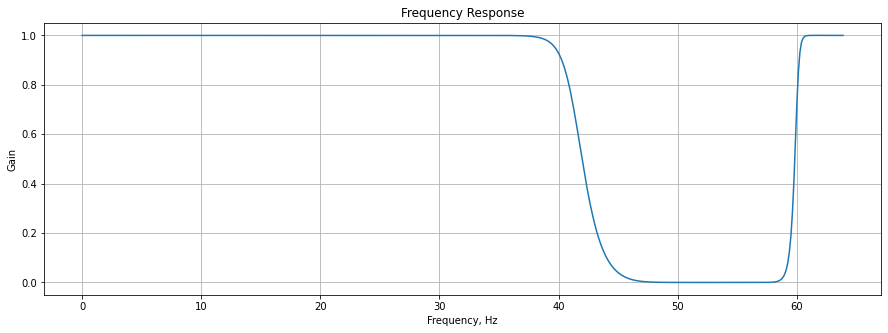

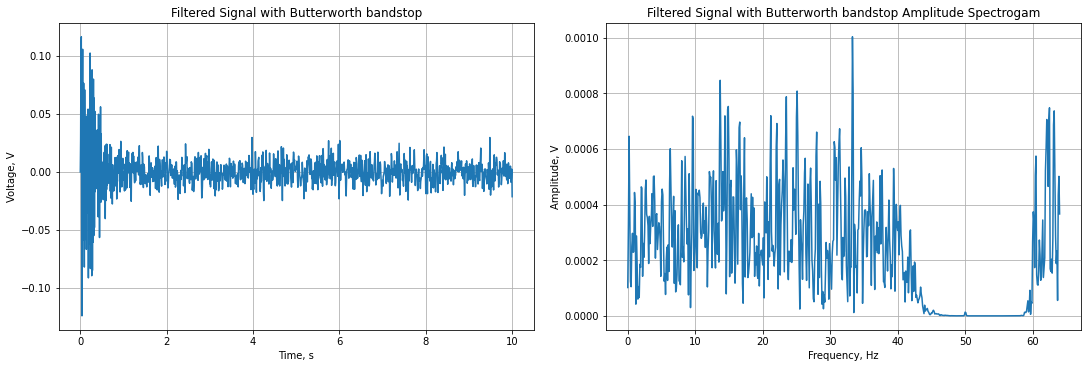

In [14]:
N, Wn = signal.buttord(wp = [freq2wx(38, freq), freq2wx(60, freq)], ws = [freq2wx(45, freq), freq2wx(55, freq)],
                       gpass=3, gstop=50, analog=False, fs=freq)
#     wp = [0.64, .99], ws = [0.7, 0.9], gpass=3, gstop=30)
but_bandstop_f = signal.butter(N, Wn, 'bandstop')

sign_but_filtered = signal.lfilter(*but_bandstop_f, sign_w_noice)
print_f_resp(N, *but_bandstop_f, freq)
print_signal(sign_but_filtered, t, 'Filtered Signal with Butterworth bandstop', freq)

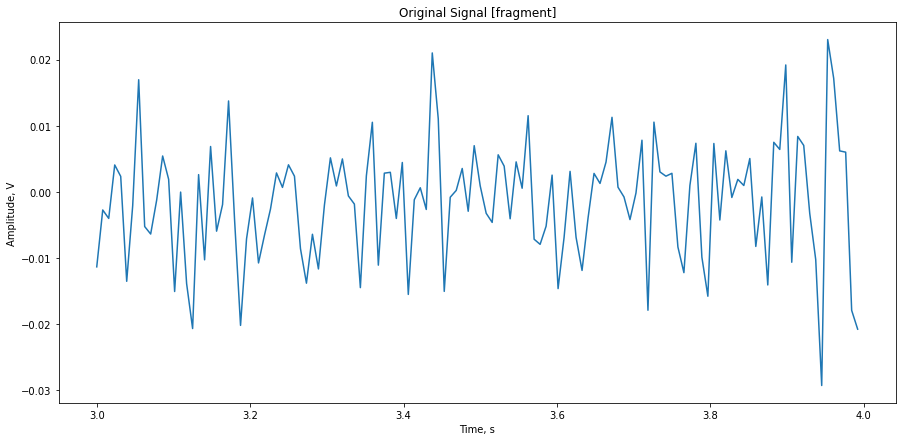

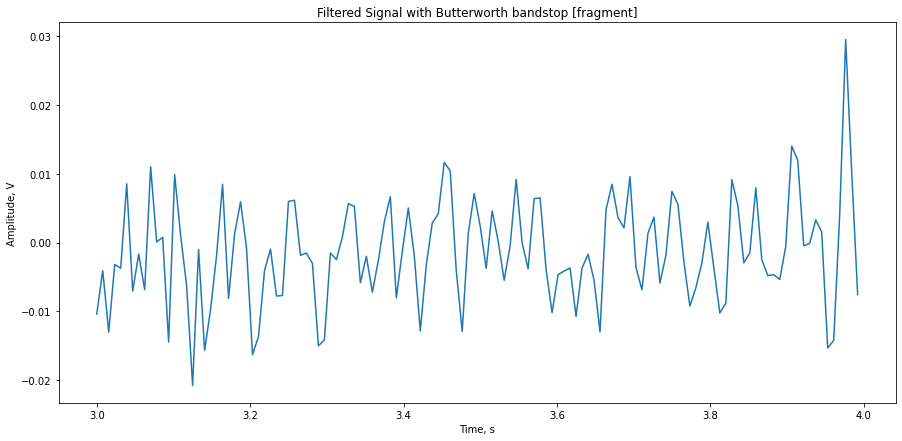

In [15]:
plot_signal_segment(sign_s, 3, 4, 128, p_title='Original Signal [fragment]',
                    p_signal_axes='Amplitude, V')
plot_signal_segment(sign_but_filtered, 3, 4, 128, p_title='Filtered Signal with Butterworth bandstop [fragment]',
                    p_signal_axes='Amplitude, V')

## Task 4.
Для звукових сигналів, які отримані з різною частотою дискретизації, виконати<br/>
допомогою фільтрів розділення на три спектральні діапазони:
- до 450 Гц
- від 450 Гц до 1кГц
- від 1 кГц до 4 кГц

Прослухати отримані сигнали, зробити висновки.

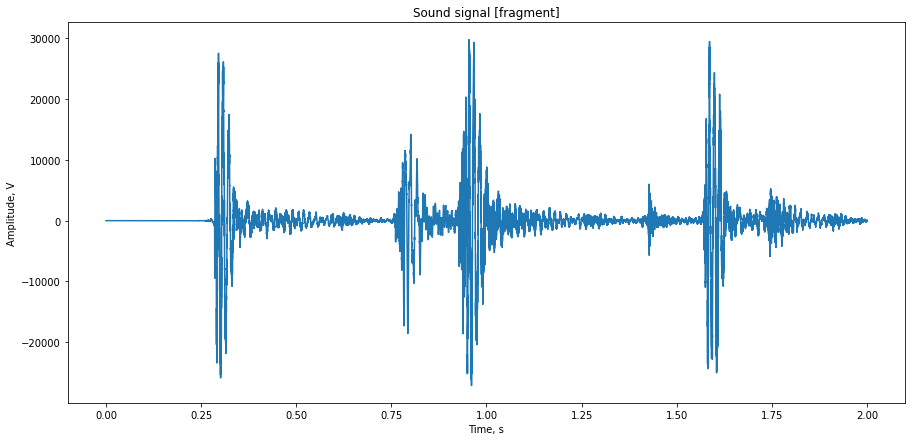

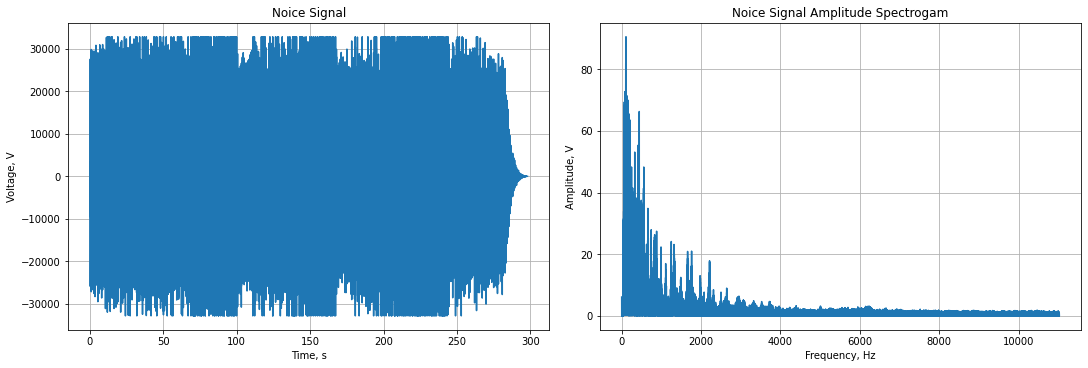

In [17]:
freq, sound = wavfile.read("../data/africa-toto.wav")
t = np.arange(0, len(sound) * (1 / freq) - 1 / freq/ 2, 1. / freq)

t_fr, sound_fr = plot_signal_segment(sound, 0, 2, freq, p_title='Sound signal [fragment]',
                    p_signal_axes='Amplitude, V', get_segment=True)
print_signal(sound, t, 'Noice Signal', freq)

Fileter rank: 10


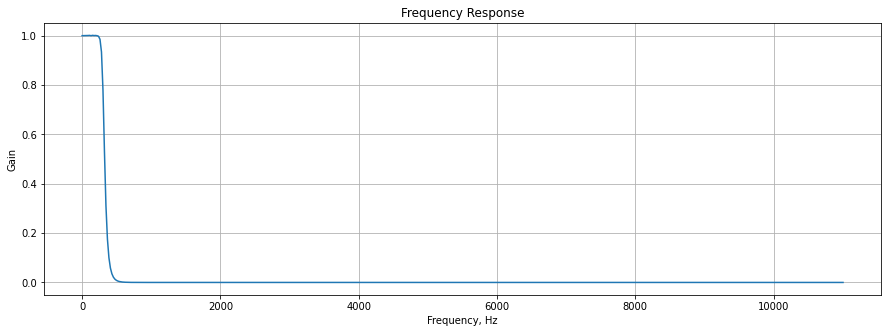

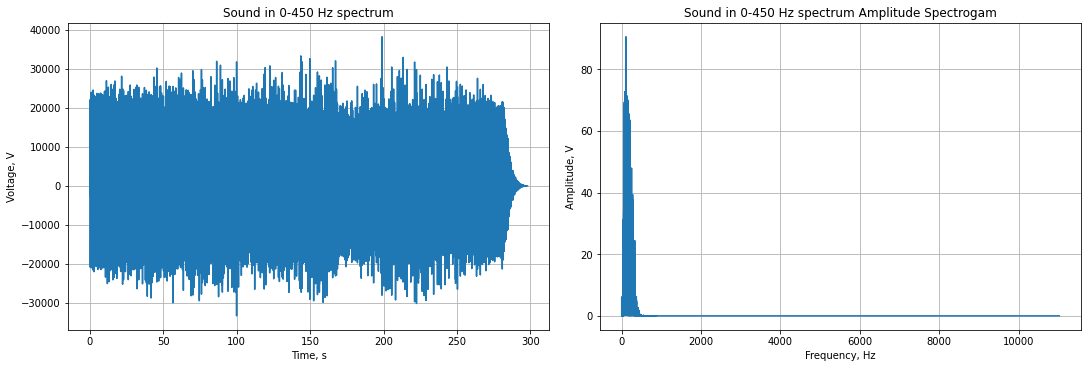

In [18]:
N, Wn = signal.buttord(wp = freq2wx(300, freq), ws = freq2wx(450, freq), gpass=2, gstop=30, analog=False, fs=freq)
b, a = signal.butter(N, Wn, "lowpass")

print_f_resp(N, b, a, freq)
print_signal(signal.lfilter(b, a, sound), t, 'Sound in 0-450 Hz spectrum', freq)

Fileter rank: 6


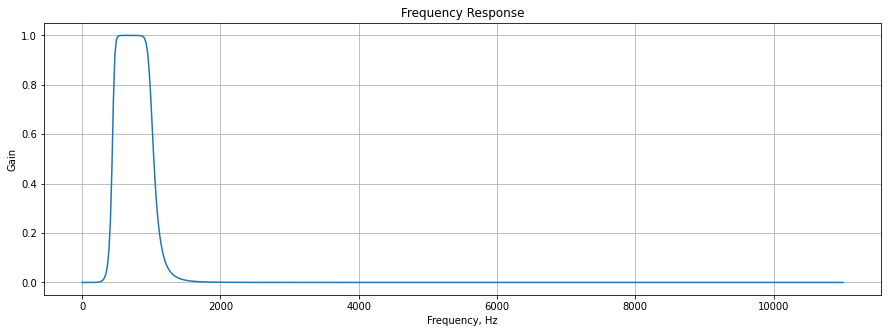

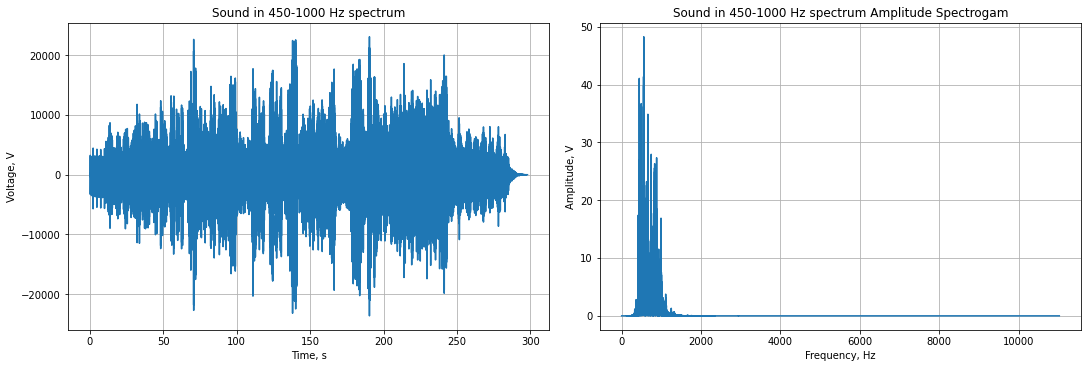

In [19]:
N, Wn = signal.buttord(wp = [freq2wx(450, freq), freq2wx(1000, freq)],
                       ws = [freq2wx(100, freq), freq2wx(1500, freq)],
                       gpass=3, gstop=40, analog=False, fs=freq)
b, a = signal.butter(N, Wn, "bandpass")

print_f_resp(N, b, a, freq)
print_signal(signal.lfilter(b, a, sound), t, 'Sound in 450-1000 Hz spectrum', freq)

Fileter rank: 10


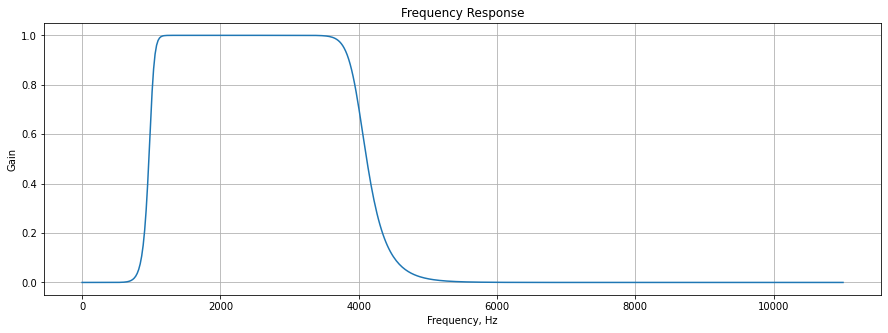

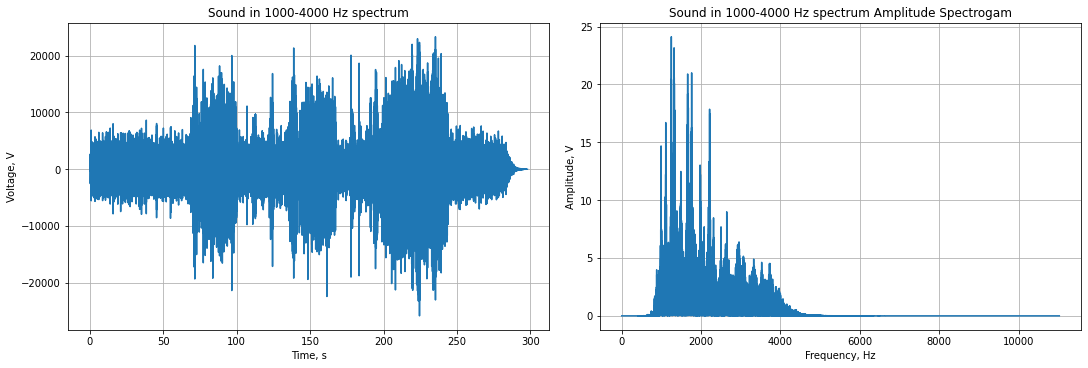

In [20]:
N, Wn = signal.buttord(wp = [freq2wx(1000, freq), freq2wx(4000, freq)],
                       ws = [freq2wx(400, freq), freq2wx(4300, freq)],
                       gpass=3, gstop=10, analog=False, fs=freq)
b, a = signal.butter(N, Wn, "bandpass")

print_f_resp(N, b, a, freq)
print_signal(signal.lfilter(b, a, sound), t, 'Sound in 1000-4000 Hz spectrum', freq)

## Контрольні питання

1. В чому полягає фільтрація сигналів та з якою метою вона проводиться?

При зчитуванні датчиками сигналів завжди ми маємо певні нетоності та стороні подразники, складові яких ми не хочемо мати в нашому сумарному вимірюванні. Щоб прибрати ці непотрібні нам частини виміру (шуми) ми застосовуємо фільтри які "витирають" вплив джерел шумів з нашого сигналу. Суть в тому що ми виділяємо спектр в якому діє шум і видаляємо або зменшуємо його вплив на наш сигнал, або берем ділянку з спектру, в яку відображається наш сигнал, і пропускаємо тільки її.

2. Як реалізується фільтрація в середовищі Python, та які попередні дані для фільтрації необхідно мати?

Для фільтрації ми можемо використати засоби бібліотеки scipy, асаме її модуля signal, в якому вже знаходяться багто готових реалізацій фільтрів. Для фільтрації потрібно мати сам сигнал в вигляді numpy array та частоту дискритизації цього сигналу, помимо цього нам треба визначитись з частотоми які ми хочемо забрати чи виділити, та максимальні втрати і силу виділення.

3. Внаслідок чого наявна відмінність в результатах застосування різних фільтрів для фільтрації одних і тих самих сигналів?

Різні фільтри заточені під різні задачі, десь краще використати один фільтр -- десь інший. Конретніше то реалізації мають свої допустимі значення коефіцієтів затримки і передачі, що беспосередньо впливає на вплив фільтра на сигнал.